In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
g_c = pd.DataFrame({'Churn_Cancel': [1, 0], 'F': [3347, 8279], 'M': [2656, 8995]})


In [4]:
g_c

,Churn_Cancel,F,M
0,1,3347,2656
1,0,8279,8995


In [11]:
gc = g_c.melt(id_vars='Churn_Cancel', value_vars=['F', 'M'], var_name='Gender', value_name='Count')

In [12]:
gc

,Churn_Cancel,Gender,Count
0,1,F,3347
1,0,F,8279
2,1,M,2656
3,0,M,8995


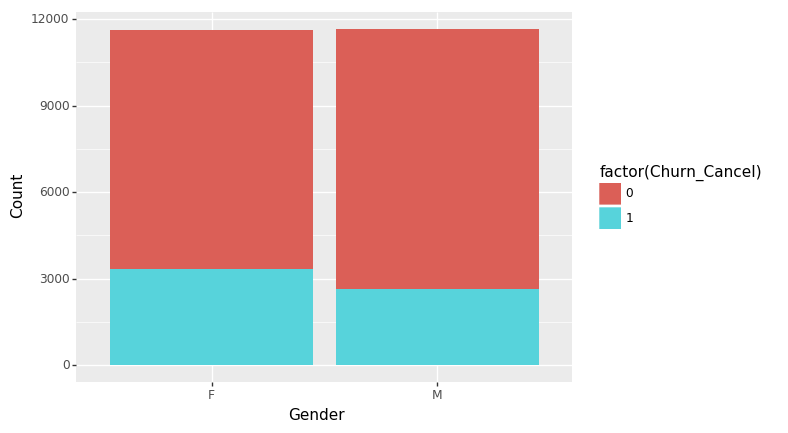

<ggplot: (-9223371875397683561)>

In [20]:
ggplot(gc, aes(fill='factor(Churn_Cancel)', y='Count', x='Gender')) +\
geom_col()

In [21]:
gc

,Churn_Cancel,Gender,Count
0,1,F,3347
1,0,F,8279
2,1,M,2656
3,0,M,8995


In [25]:
gc.groupby('Gender').apply(lambda x: x['Count']=x.Count/x.count.sum())

SyntaxError: lambda cannot contain assignment (<ipython-input-25-a17d0bdfa586>, line 1)

In [23]:
gc.Count/gc.Count.sum()

0    0.143790
1    0.355673
2    0.114104
3    0.386433
Name: Count, dtype: float64

In [26]:
gc

,Churn_Cancel,Gender,Count
0,1,F,3347
1,0,F,8279
2,1,M,2656
3,0,M,8995


In [27]:
gc.groupby('Gender')['Count'].sum()

Gender
F    11626
M    11651
Name: Count, dtype: int64

In [28]:
_27.reset_index()

,Gender,Count
0,F,11626
1,M,11651


In [29]:
gc.merge(_28, on='Gender')

,Churn_Cancel,Gender,Count_x,Count_y
0,1,F,3347,11626
1,0,F,8279,11626
2,1,M,2656,11651
3,0,M,8995,11651


In [ ]:
+-------------------+---+---+
|churn_Cancel_gender|  F|  M|
+-------------------+---+---+
|                  1| 45| 54|
|                  0|153|196|
+-------------------+---+---+

+----------------------+---+---+
|churn_Downgrade_gender|  F|  M|
+----------------------+---+---+
|                     1| 46| 51|
|                     0|152|199|
+----------------------+---+---+

In [30]:
['a']*4

['a', 'a', 'a', 'a']

In [31]:
churn = pd.DataFrame({
    'Type': ['churn_Cancel']*4 + ['churn_Downgrade']*4,
    'Churn':[1, 0, 1, 0, 1, 0, 1, 0],
    'Gender': ['F', 'F', 'M', 'M']*2,
    'Count': [45, 153, 54, 196, 46, 152, 51, 199]
})

In [32]:
churn

,Type,Churn,Gender,Count
0,churn_Cancel,1,F,45
1,churn_Cancel,0,F,153
2,churn_Cancel,1,M,54
3,churn_Cancel,0,M,196
4,churn_Downgrade,1,F,46
5,churn_Downgrade,0,F,152
6,churn_Downgrade,1,M,51
7,churn_Downgrade,0,M,199


In [37]:
total = churn.groupby(['Type', 'Gender'])['Count'].sum().reset_index()

In [38]:
total.reset_index()

,index,Type,Gender,Count
0,0,churn_Cancel,F,198
1,1,churn_Cancel,M,250
2,2,churn_Downgrade,F,198
3,3,churn_Downgrade,M,250


In [39]:
churn_total = churn.merge(total, on=['Type', 'Gender'])

In [41]:
churn_total['Portion']=churn_total['Count_x']/churn_total['Count_y']*100

In [42]:
churn_total

,Type,Churn,Gender,Count_x,Count_y,Portion
0,churn_Cancel,1,F,45,198,22.727273
1,churn_Cancel,0,F,153,198,77.272727
2,churn_Cancel,1,M,54,250,21.600000
3,churn_Cancel,0,M,196,250,78.400000
4,churn_Downgrade,1,F,46,198,23.232323
5,churn_Downgrade,0,F,152,198,76.767677
6,churn_Downgrade,1,M,51,250,20.400000
7,churn_Downgrade,0,M,199,250,79.600000


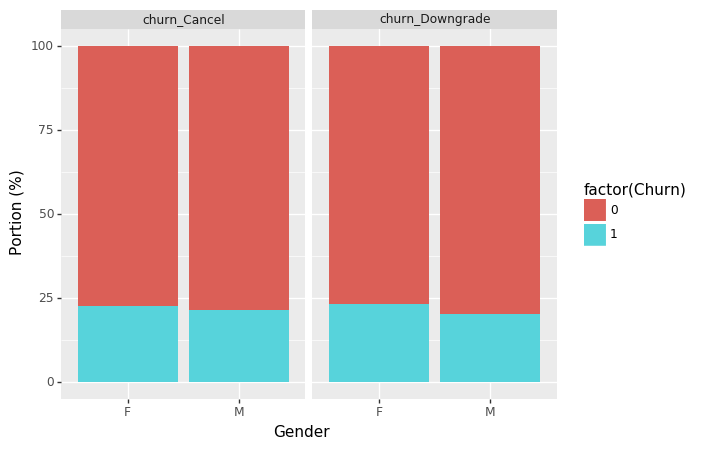

<ggplot: (-9223371875396610823)>

In [57]:
(ggplot(churn_total, aes(x='Gender', y='Portion', fill='factor(Churn)'))
+facet_wrap('~Type')
 +geom_col()
+ylab('Portion (%)')
)

In [ ]:
+-----------------------+---+---+
|churn_Cancel_status_404|  0|  1|
+-----------------------+---+---+
|                      1| 59| 40|
|                      0|166|183|
+-----------------------+---+---+
+--------------------------+---+---+
|churn_Downgrade_status_404|  0|  1|
+--------------------------+---+---+
|                         1| 27| 70|
|                         0|198|153|
+--------------------------+---+---+

In [58]:
churn_status = pd.DataFrame({
    'Type': ['churn_Cancel']*4 + ['churn_Downgrade']*4,
    'Churn':[1, 0, 1, 0, 1, 0, 1, 0],
    'Status_404': [0, 0, 1, 1]*2,
    'Count': [59, 166, 40, 183, 27, 198, 70, 153]
})

In [59]:
churn_status

,Type,Churn,Status_404,Count
0,churn_Cancel,1,0,59
1,churn_Cancel,0,0,166
2,churn_Cancel,1,1,40
3,churn_Cancel,0,1,183
4,churn_Downgrade,1,0,27
5,churn_Downgrade,0,0,198
6,churn_Downgrade,1,1,70
7,churn_Downgrade,0,1,153


In [61]:
total = churn_status.groupby(['Type', 'Status_404'])['Count'].sum().reset_index()

In [62]:
churn_total_status = churn_status.merge(total, on=['Type', 'Status_404'])

In [63]:
churn_total_status['Portion']=churn_total_status['Count_x']/churn_total_status['Count_y']*100

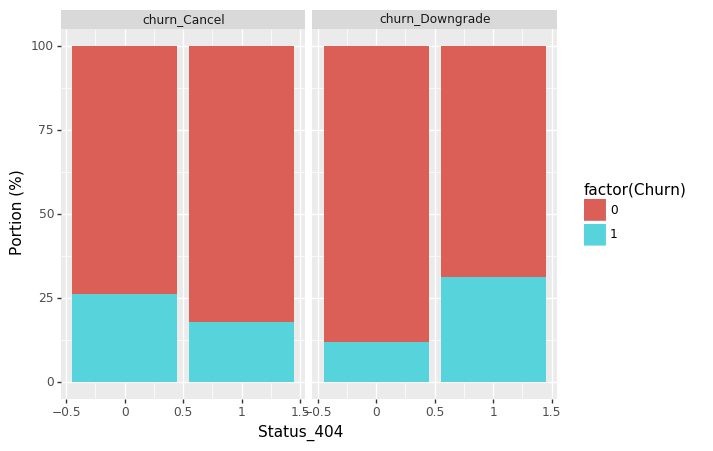

<ggplot: (-9223371875396610844)>

In [64]:
(ggplot(churn_total_status, aes(x='Status_404', y='Portion', fill='factor(Churn)'))
+facet_wrap('~Type')
 +geom_col()
+ylab('Portion (%)')
)

In [ ]:
+-------------------+---+-------+---+----+------+
|churn_Cancel_device|Mac|Windows|X11|iPad|iPhone|
+-------------------+---+-------+---+----+------+
|                  1| 35|     48|  5|   0|    11|
|                  0|138|    174| 21|   9|     7|
+-------------------+---+-------+---+----+------+
+----------------------+---+-------+---+----+------+
|churn_Downgrade_device|Mac|Windows|X11|iPad|iPhone|
+----------------------+---+-------+---+----+------+
|                     1| 37|     45|  7|   2|     6|
|                     0|136|    177| 19|   7|    12|
+----------------------+---+-------+---+----+------+

In [71]:
churn = pd.DataFrame({
    'Type': ['churn_Cancel']*10 + ['churn_Downgrade']*10,
    'Churn':[1, 0]*10,
    'Device': ['Mac', 'Mac', 'Windows', 'Windows', 'X11', 'X11', 'iPad', 'iPad', 'iPhone', 'iPhone']*2,
    'Count': [35, 138, 48, 174, 5, 21, 0, 9, 11, 7, 37, 136, 45, 177, 7, 19, 2, 7, 6, 12]
})

In [72]:
churn

,Type,Churn,Device,Count
0,churn_Cancel,1,Mac,35
1,churn_Cancel,0,Mac,138
2,churn_Cancel,1,Windows,48
3,churn_Cancel,0,Windows,174
4,churn_Cancel,1,X11,5
5,churn_Cancel,0,X11,21
6,churn_Cancel,1,iPad,0
7,churn_Cancel,0,iPad,9
8,churn_Cancel,1,iPhone,11
9,churn_Cancel,0,iPhone,7


In [74]:
total = churn.groupby(['Type', 'Device'])['Count'].sum().reset_index()

In [75]:
total

,Type,Device,Count
0,churn_Cancel,Mac,173
1,churn_Cancel,Windows,222
2,churn_Cancel,X11,26
3,churn_Cancel,iPad,9
4,churn_Cancel,iPhone,18
5,churn_Downgrade,Mac,173
6,churn_Downgrade,Windows,222
7,churn_Downgrade,X11,26
8,churn_Downgrade,iPad,9
9,churn_Downgrade,iPhone,18


In [77]:
churn_total = churn.merge(total, on=['Type', 'Device'])

In [79]:
churn_total['Portion']=churn_total['Count_x']/churn_total['Count_y']*100

In [80]:
churn_total

,Type,Churn,Device,Count_x,Count_y,Portion
0,churn_Cancel,1,Mac,35,173,20.231214
1,churn_Cancel,0,Mac,138,173,79.768786
2,churn_Cancel,1,Windows,48,222,21.621622
3,churn_Cancel,0,Windows,174,222,78.378378
4,churn_Cancel,1,X11,5,26,19.230769
5,churn_Cancel,0,X11,21,26,80.769231
6,churn_Cancel,1,iPad,0,9,0.000000
7,churn_Cancel,0,iPad,9,9,100.000000
8,churn_Cancel,1,iPhone,11,18,61.111111
9,churn_Cancel,0,iPhone,7,18,38.888889


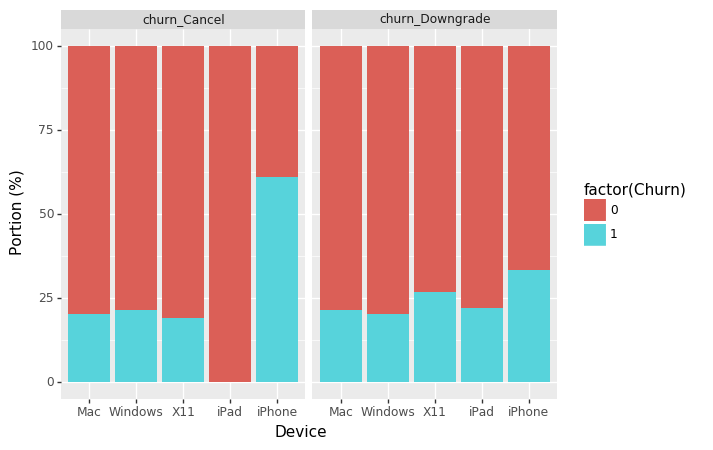

<ggplot: (161457852231)>

In [81]:
(ggplot(churn_total, aes(x='Device', y='Portion', fill='factor(Churn)'))
+facet_wrap('~Type')
 +geom_col()
+ylab('Portion (%)')
)

In [2]:
import pyspark

In [3]:
spark = pyspark.sql.SparkSession \
        .builder \
        .master('local[*]') \
        .appName('Sparkify') \
        .getOrCreate()

In [9]:
df = spark.createDataFrame([Row('churn_Cancel'=1, 'avg(thumb_up_ratio)'=0.039791181423047786, 'avg(add_friend_ratio)'=0.014471172925169683, 'avg(roll_advert_ratio)'=0.040880366689801446, 'avg(add_palylist_ratio)'=0.02081255591524812, 'avg(thumb_down_ratio)'=0.01083540837399207, 'avg(submit_upgrade_ratio)'=0.0011168263550515546, 'avg(session_len_avg)'=17451.207411462936, 'avg(time)'=67.96801989805464, 'avg(session_len_std)'=14958.45668260582, 'avg(error_ratio)'=0.0006449270849316139),
 Row('churn_Cancel'=0, 'avg(thumb_up_ratio)'=0.04330325117489644, 'avg(add_friend_ratio)'=0.015738068017301533, 'avg(roll_advert_ratio)'=0.02831708302508494, 'avg(add_palylist_ratio)'=0.022584436585174603, 'avg(thumb_down_ratio)'=0.009424074927279416, 'avg(submit_upgrade_ratio)'=0.0006893236837217985, 'avg(session_len_avg)'=15674.76971806671, 'avg(time)'=87.04871421654465, 'avg(session_len_std)'=15757.455012439019, 'avg(error_ratio)'=0.0010410283429297621)])

SyntaxError: keyword can't be an expression (<ipython-input-9-67bdc8dc7d31>, line 1)

In [8]:
from pyspark.sql import Row

In [10]:
help(Row)

Help on class Row in module pyspark.sql.types:

class Row(builtins.tuple)
 |  Row(*args, **kwargs)
 |  
 |  A row in L{DataFrame}.
 |  The fields in it can be accessed:
 |  
 |  * like attributes (``row.key``)
 |  * like dictionary values (``row[key]``)
 |  
 |  ``key in row`` will search through row keys.
 |  
 |  Row can be used to create a row object by using named arguments,
 |  the fields will be sorted by names. It is not allowed to omit
 |  a named argument to represent the value is None or missing. This should be
 |  explicitly set to None in this case.
 |  
 |  >>> row = Row(name="Alice", age=11)
 |  >>> row
 |  Row(age=11, name='Alice')
 |  >>> row['name'], row['age']
 |  ('Alice', 11)
 |  >>> row.name, row.age
 |  ('Alice', 11)
 |  >>> 'name' in row
 |  True
 |  >>> 'wrong_key' in row
 |  False
 |  
 |  Row also can be used to create another Row like class, then it
 |  could be used to create Row objects, such as
 |  
 |  >>> Person = Row("name", "age")
 |  >>> Person
 |  <R

In [18]:
df = spark.createDataFrame([Row(churn_Cancel=1, thumb_up_ratio=0.039791181423047786, add_friend_ratio=0.014471172925169683, roll_advert_ratio=0.040880366689801446, add_palylist_ratio=0.02081255591524812, thumb_down_ratio=0.01083540837399207, submit_upgrade_ratio=0.0011168263550515546, session_len_avg=17451.207411462936, time=67.96801989805464, session_len_std=14958.45668260582, error_ratio=0.0006449270849316139),
 Row(churn_Cancel=0, thumb_up_ratio=0.04330325117489644, add_friend_ratio=0.015738068017301533, roll_advert_ratio=0.02831708302508494, add_palylist_ratio=0.022584436585174603, thumb_down_ratio=0.009424074927279416, submit_upgrade_ratio=0.0006893236837217985, session_len_avg=15674.76971806671, time=87.04871421654465, session_len_std=15757.455012439019, error_ratio=0.0010410283429297621)])

In [19]:
df.show()

+--------------------+--------------------+------------+--------------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+-----------------+
|    add_friend_ratio|  add_palylist_ratio|churn_Cancel|         error_ratio|   roll_advert_ratio|   session_len_avg|   session_len_std|submit_upgrade_ratio|    thumb_down_ratio|      thumb_up_ratio|             time|
+--------------------+--------------------+------------+--------------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+-----------------+
|0.014471172925169683| 0.02081255591524812|           1|6.449270849316139E-4|0.040880366689801446|17451.207411462936| 14958.45668260582|0.001116826355051...| 0.01083540837399207|0.039791181423047786|67.96801989805464|
|0.015738068017301533|0.022584436585174603|           0|0.001041028342929...| 0.02831708302508494| 15674.76971806671|15757.45501

In [20]:
df = df.toPandas()

In [21]:
df

,add_friend_ratio,add_palylist_ratio,churn_Cancel,error_ratio,roll_advert_ratio,session_len_avg,session_len_std,submit_upgrade_ratio,thumb_down_ratio,thumb_up_ratio,time
0,0.014471,0.020813,1,0.000645,0.040880,17451.207411,14958.456683,0.001117,0.010835,0.039791,67.968020
1,0.015738,0.022584,0,0.001041,0.028317,15674.769718,15757.455012,0.000689,0.009424,0.043303,87.048714


In [24]:
d = df.set_index('churn_Cancel')

In [25]:
d

,add_friend_ratio,add_palylist_ratio,error_ratio,roll_advert_ratio,session_len_avg,session_len_std,submit_upgrade_ratio,thumb_down_ratio,thumb_up_ratio,time
churn_Cancel,,,,,,,,,,
1,0.014471,0.020813,0.000645,0.040880,17451.207411,14958.456683,0.001117,0.010835,0.039791,67.968020
0,0.015738,0.022584,0.001041,0.028317,15674.769718,15757.455012,0.000689,0.009424,0.043303,87.048714


In [28]:
delta = (d.loc[1]/d.loc[0]-1)*100

In [29]:
delta

add_friend_ratio        -8.049877
add_palylist_ratio      -7.845583
error_ratio            -38.049037
roll_advert_ratio       44.366447
session_len_avg         11.333102
session_len_std         -5.070605
submit_upgrade_ratio    62.017697
thumb_down_ratio        14.975830
thumb_up_ratio          -8.110407
time                   -21.919559
dtype: float64

Text(0, 0.5, 'Delta (%)')

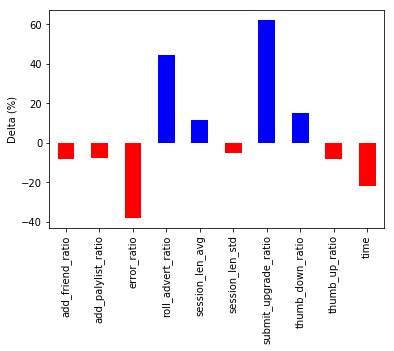

In [34]:
color = ['b' if x>0 else 'r' for x in delta]
delta.plot.bar(color=color);
plt.ylabel('Delta (%)')

In [36]:
#Full dataset
fi_cancel = pd.DataFrame({'Importance': [0.11156252, 0.10679758, 0.06009227, 0.15211177, 0.03097527,
       0.08795566, 0.04286932, 0.10515224, 0.09834546, 0.18061292,
       0.00132843, 0.00328822, 0.00262389, 0.00681254, 0.00340545,
       0.00606647], 'Feature': ['thumb_up_ratio', 'thumb_down_ratio', 'add_friend_ratio', 'roll_advert_ratio', 'add_palylist_ratio', 'submit_upgrade_ratio', 'error_ratio', 'session_len_avg', 'session_len_std', 'time', 'gender', 'status_404', 'device0', 'device1', 'device2', 'device3']})

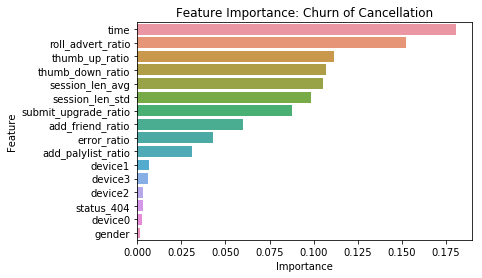

In [47]:
sns.barplot(y='Feature', x='Importance', data=fi_cancel.sort_values('Importance', ascending=False))
plt.title('Feature Importance: Churn of Cancellation');

In [46]:
fi_downgrade=pd.DataFrame({'Importance': [0.07873384, 0.09587231, 0.07568663, 0.21681246, 0.07383164,
       0.21422365, 0.05922658, 0.05971482, 0.06581646, 0.0407637 ,
       0.00100988, 0.00167394, 0.00261001, 0.00144628, 0.00886811,
       0.00370969], 
    'Feature': ['thumb_up_ratio', 'thumb_down_ratio', 'add_friend_ratio', 'roll_advert_ratio', 'add_palylist_ratio', 'submit_upgrade_ratio', 'error_ratio', 'session_len_avg', 'session_len_std', 'time', 'gender', 'status_404', 'device0', 'device1', 'device2', 'device3']})

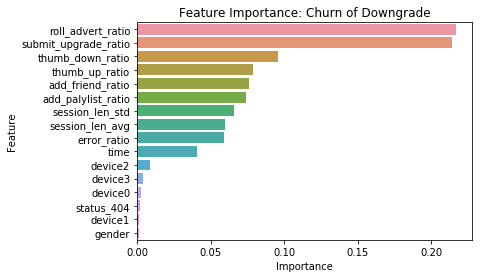

In [48]:
sns.barplot(y='Feature', x='Importance', data=fi_downgrade.sort_values('Importance', ascending=False))
plt.title('Feature Importance: Churn of Downgrade');

In [54]:
## Mean of continuous features for churn and no-churn
mean_cancel = spark.createDataFrame([Row(churn_Cancel=1, thumb_up_ratio=0.03884181695625863, add_friend_ratio=0.014475170310004592, 
                                         roll_advert_ratio=0.03729404184393977, add_palylist_ratio=0.021833674471137175, 
                                         thumb_down_ratio=0.011992995161779773, submit_upgrade_ratio=0.0011073805918634905, 
                                         session_len_avg=17222.53430207806, time=63.718817195793605, session_len_std=15859.129901157647, 
                                         error_ratio=0.0010104320777228081), Row(churn_Cancel=0, thumb_up_ratio=0.04426469342324222, 
                                        add_friend_ratio=0.015147195222619793, roll_advert_ratio=0.029078504439365126, 
                                        add_palylist_ratio=0.022549195283939533, thumb_down_ratio=0.009611730964541678, submit_upgrade_ratio=0.0008096641362242619,session_len_avg=16391.743286512923, 
                                        time=89.08563652583202, session_len_std=15906.165752162457, error_ratio=0.001021583859221606)]).toPandas()

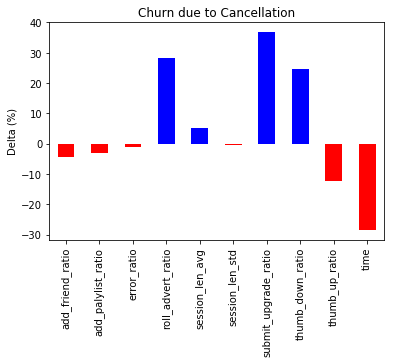

In [55]:
mean_cancel = mean_cancel.set_index('churn_Cancel')
delta_cancel = mean_cancel.loc[1]/mean_cancel.loc[0]*100-100
color = ['b' if x>0 else 'r' for x in delta_mean]
delta_cancel.plot.bar(color=color);
plt.ylabel('Delta (%)');
plt.title('Churn due to Cancellation');

In [57]:
mean_downgrade = spark.createDataFrame([Row(churn_Downgrade=1, thumb_up_ratio=0.04200537339626784, add_friend_ratio=0.014954732202469102, roll_advert_ratio=0.022614039230351966, add_palylist_ratio=0.022902345636838274, thumb_down_ratio=0.010473076061888603, submit_upgrade_ratio=0.0010578505759255895, session_len_avg=18895.018488125126, time=88.99539589321101, session_len_std=20174.979011201605, error_ratio=0.0009847229626781869), 
                  Row(churn_Downgrade=0, thumb_up_ratio=0.04335626551671669, add_friend_ratio=0.015008613538330455, roll_advert_ratio=0.033392612952040185, add_palylist_ratio=0.02223582176133022, thumb_down_ratio=0.010049486918135534, submit_upgrade_ratio=0.0008226477175545974, session_len_avg=15889.951863259479, time=81.72277993098417, session_len_std=14624.048923033899, error_ratio=0.0010292878764699219)]).toPandas()

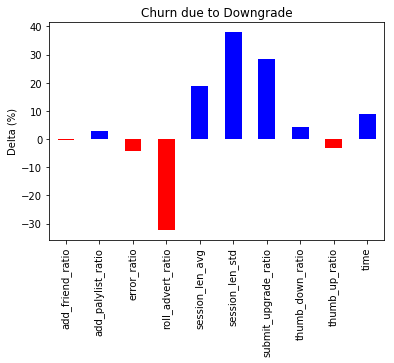

In [58]:
mean_downgrade = mean_downgrade.set_index('churn_Downgrade')
delta_downgrade = mean_downgrade.loc[1]/mean_downgrade.loc[0]*100-100
color = ['b' if x>0 else 'r' for x in delta_downgrade]
delta_downgrade.plot.bar(color=color);
plt.ylabel('Delta (%)');
plt.title('Churn due to Downgrade');

In [ ]:
+----------------------------+-----+----+
|churn_Cancel_churn_Downgrade|    0|   1|
+----------------------------+-----+----+
|                           1| 3860|1143|
|                           0|13314|3960|
+----------------------------+-----+----+

In [59]:
(3860+1143)/(3860+1143+13314+3960)

0.22458140683215874

In [60]:
(1143+3960)/(1143+3960+3860+13314)

0.22907034160793643